Problem 4 (4 pts): Build ANNs for multi-class classification considering all the classes (10 classes) in the
MNIST digit dataset with combinations of batch sizes and learning rates. Consider batch sizes: 4, 16, 32,
and 64; and learning rate 0.01, 0.001, 0.0001, and 0.00001. Finally, create a plot of test accuracy vs. ratio
of batch size to learning rate, and discuss your findings.

In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping




In [2]:
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# model
def create_model(learning_rate):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [10]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# earlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Batch sizes and learning rates combinations
batch_sizes = [4, 16, 32, 64]
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
results = []



In [5]:
# to train models with different batch sizes and learning rates
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        print(f"Training with batch size {batch_size} and learning rate {learning_rate}")
        model = create_model(learning_rate=learning_rate)
        model.fit(
            train_images,
            train_labels,
            epochs=100,     #epochs = 100
            batch_size=batch_size,
            validation_split=0.1,
            callbacks=[early_stopping],
            verbose=1
        )
        test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
        results.append((batch_size, learning_rate, test_accuracy))


Training with batch size 4 and learning rate 0.01
Epoch 1/100
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.8362 - loss: 0.5546 - val_accuracy: 0.9300 - val_loss: 0.2687
Epoch 2/100
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9123 - loss: 0.3418 - val_accuracy: 0.9295 - val_loss: 0.2779
Epoch 3/100
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9182 - loss: 0.3273 - val_accuracy: 0.9418 - val_loss: 0.2434
Epoch 4/100
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9239 - loss: 0.3116 - val_accuracy: 0.9402 - val_loss: 0.2537
Epoch 5/100
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9276 - loss: 0.2937 - val_accuracy: 0.9393 - val_loss: 0.2606
Epoch 6/100
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9283 - loss: 0.2981 - val_accuracy: 0.9210 - val_loss: 0.3004
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.
Training with batch size 4 and learning rate 0.001
Epoch 1/100


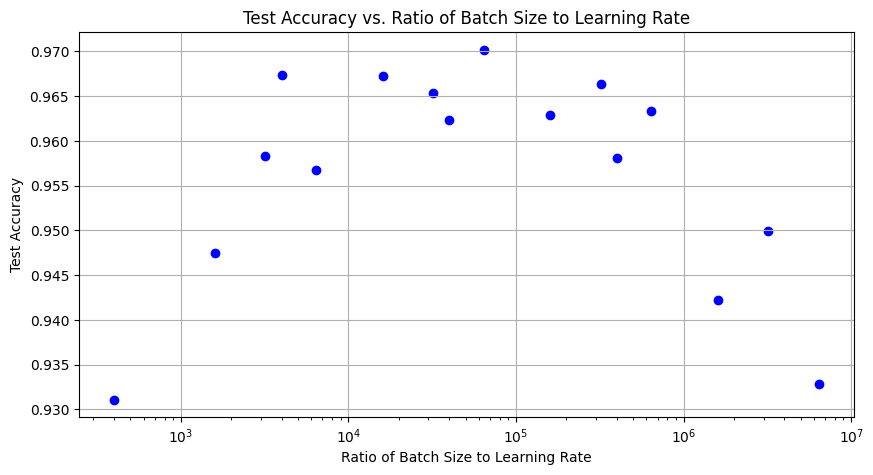

In [6]:

# ratios of batch size to learning rate and plot results
ratios = [bs/lr for bs, lr, _ in results]
accuracies = [acc for _, _, acc in results]


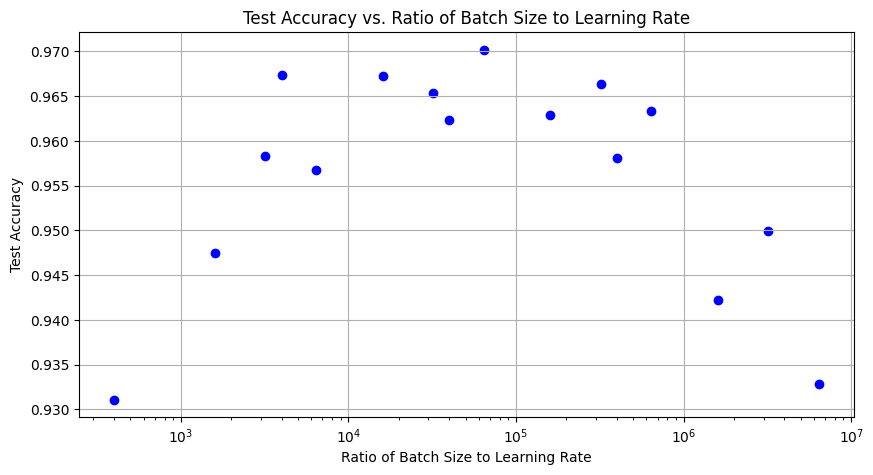

In [7]:
#plot
plt.figure(figsize=(10, 5))
plt.scatter(ratios, accuracies, color='blue')
plt.title('Test Accuracy vs. Ratio of Batch Size to Learning Rate')
plt.xlabel('Ratio of Batch Size to Learning Rate')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xscale('log')
plt.show()

**Observations:**
- The charts display how varying the ratio of batch size to learning rate affects test accuracy in training ANNs for the MNIST dataset.
- Larger ratios generally correlate with higher test accuracies, indicating that either increasing batch size or decreasing the learning rate can enhance model performance.
-There's a clear peak in performance at mid-range ratios, suggesting an optimal balance between batch size and learning rate, beyond which performance may plateau or even decrease, as seen in the highest ratio values.







